# DSA70804B Driver Test

In [11]:
dsc.close()

In [1]:
import sqdtoolz as sqdt
import numpy as np
import os
import pandas as pd 
from matplotlib import pyplot as plt
from time import sleep
from sqdtoolz.Utilities.DataFitting import*
from sqdtoolz.Utilities.DataFitting import DFitNotchResonance
from sqdtoolz.Utilities.FileIO import FileIOReader
from sqdtoolz.Drivers.ACQ_TektronixDSA70804B import TektronixDSA70804B
# from resonator_tools import circuit
import datetime

# creates a lab object which registers all instruments from the .yaml file and handles the Hardware Abstraction Layer (HAL) objects
lab = sqdt.Laboratory(instr_config_file = "ACQ_dsc_Rack.yaml", save_dir = "z:\\Data\\Double-Upconversion_NEW_Oscilloscope_Driver_Test\\", using_VS_Code=True)
# dsc.close_all()
dsc= TektronixDSA70804B('DSA70804B', address='TCPIP::192.168.1.200')
# lab.load_instrument('dsc')
# sqdt.HAL.ACQdsc('dsc', lab, ['dsc','CH1'])

In [ ]:
dsc.submodules['A']

In [15]:
#Load Instruments

lab.load_instrument('MWS_Windfreak_3')
wf3_channel_a = sqdt.GENmwSource('WINDFREAK_CH_A', lab, 'MWS_Windfreak_3', 'RFoutA') #HAL
wf3_channel_b = sqdt.GENmwSource('WINDFREAK_CH_B', lab, 'MWS_Windfreak_3', 'RFoutB') #HAL
#Windfreak 3 channels

#channel A
wf3_channel_a.Power = 0 #dBm
wf3_channel_a.Output = True
wf3_channel_a.Frequency = 4e9 #LO1 3.4e9
wf3_channel_a.Mode = 'Continuous'

#channel B
wf3_channel_b.Power = 0 #dBm
wf3_channel_b.Output = True
wf3_channel_b.Frequency = 7.95e9 #LO2 8.9e9
wf3_channel_b.Mode = 'Continuous'

In [ ]:
dsc.close()#close the instrument to avoid duplicate names
lab.release_all_instruments()

In [ ]:
dsc.submodules['CH1'].VerticalPosition=0


In [ ]:
dsc.DataEncdg='ribinary'
dsc.WfmoutpreBytNr=2
print(dsc.DataEncdg);print(dsc.DataEncdg=='RIB')
print(dsc.WfmoutpreBytNr);print(dsc.WfmoutpreBytNr==2)
print(dsc.WfmoutpreBnFmt);print(dsc.WfmoutpreBnFmt=='RI')
print(dsc.WfmoutpreBytNr);print(dsc.WfmoutpreBytNr==1)

In [3]:
dsc.Autoset='execute'
dsc.Select

'1;0;0;0;0;0;0;0;0;0;0;0;CH1'

In [4]:
dsc.Autoset='execute'

In [ ]:
dsc.submodules['CH4'].SelectCh='off'

In [ ]:
dsc.submodules['A'].TriggerStateSys

HorizontalAcqduration (s): 1.25e-09
HorizontalAcqlength (pts): 1250
SampleRate (GHz): 1000.0
TimeScale (s): 1.25e-10
verify to HorizontalAcqduration (s): 1.25e-09
:WFMO:BYT_N 2;BIT_N 16;ENC BIN;BN_F RI;BYT_O LSB;WFI "Ch1, DC coupling, 100.0mV/div, 125.0ps/div, 1250 points, Sample mode";NR_P 1250;PT_F Y;XUN "s";XIN 1.0000E-12;XZE 479.7506E-15;PT_O 625;YUN "V";YMU 15.6250E-6;YOF 0.0000;YZE 0.0000;NR_FR 1
FAS
RI
2


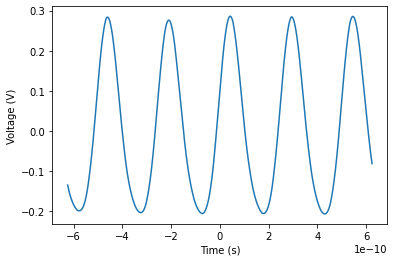

In [7]:

ch_num=1
dsc.AcuireMode='sample'
dsc.TriggerHoldoffBy='random'# vals.Enum('time','default','random','auto')
dsc.submodules[f'CH{ch_num}'].SelectCh='on'
dsc.DataSource=f'ch{ch_num}'
dsc.submodules['A'].TriggerEdgeSource=f'ch{ch_num}'
dsc.submodules['A'].Trigger='setlevel'
dsc.submodules['A'].TriggerEdgeCoupling='dc'
dsc.submodules['A'].TriggerEdgeSlope='rise'
dsc.submodules['A'].TriggerLevel=0.1
dsc.submodules['B'].TriggerState='off'
dsc.submodules['A'].TriggerStateSys#the tigger states: ready, armed, or Trig'd
# dsc.Autoset='execute' # auto set takes time, before which finishes, if you read data, timeout expires might happen
DataEncdg={0:'ascii',1:'fastest',  2:'ribinary', 3:'rpbinary', 4:'fpbinary',\
                                   5:'sribinary',6:'srpbinary',7:'sfpbinary'}
dsc.DataEncdg=DataEncdg[1]
dsc.HorizontalPosition=50#trigger point at 50% of the horizontal axis
dsc.AcquireSamplingmode='it' #Interpolation: Nyquist sampling theorem
dsc.HorizontalMode='auto'

#'auto': you can set the Scale and Sample Rate. Record length is a dependent variable.
# 'constant': set the Scale and Sample Rate, Record length dependent.
# 'manual', manual mode can be used to change samplerate and record length simultaneously
# Automatic and Constant Sample Rate modes are identical. However, Constant Sample Rate mode keeps the sample rate constant at a rate that guarantees bandwidth enhancement filters are used.
# dsc.HorizontalModeRecordlength=200
dsc.TimeScale=5/4e9/10 #the signal frequency is (period number:2)/(signal frequency: 4e9)/(division number:10);not accurate as real settings
# dsc.HorizontalAcqlength=200
print('HorizontalAcqduration (s):',dsc.HorizontalAcqduration)
print('HorizontalAcqlength (pts):',dsc.HorizontalAcqlength)
print('SampleRate (GHz):',dsc.SampleRate/1e9)
print('TimeScale (s):',dsc.TimeScale)
print('verify to HorizontalAcqduration (s):',dsc.HorizontalAcqlength/dsc.SampleRate)
# print(dsc.SampleRate)
# dsc.WfmoutpreBytNr=2
dsc.DataStart=1
dsc.DataStop=dsc.HorizontalAcqlength
dsc._Header='on'
print(dsc.Wfmoutpre)
dsc._Header='off'
# wfm_data=scp.visa_handle.query_binary_values('CURVe?', datatype='h')
#see https://docs.python.org/2/library/struct.html#format-characters for datatype
# plt.plot(wfm_data)
# plt.show()
dsc.wfm_plot()

In [ ]:
dsc.write('HORizontal:MODE:RECOrdlength 200')
dsc.SampleRate=200e9

In [ ]:
dsc.submodules['A']

In [ ]:
dsc.SampleRate/1e9

In [ ]:
dsc.ask('HORizontal:MODE:RECOrdlength?')

In [ ]:
test=float('inf')
1/test
print(1>-test)

In [ ]:
dsc.HorizontalAcqlength

In [ ]:
dsc.WfmoutprePtOff

In [ ]:
1.75*500

In [ ]:
dsc._Header='on'
print(dsc.ask('HORizontal:MAIn?'))
print()


In [ ]:
dsc._Header='off'
dsc.ask('horizontal:digital:samplerate:main?')

In [ ]:
p_n=dsc.ask('HORizontal:ACQLENGTH?')

In [ ]:
float(p_n)/sr

In [ ]:
tmp=scp.ask('wfmoutpre:bn_fmt?')
print(tmp)
tmp=scp.ask('wfmoutpre:byt_nr?')
print(tmp)

In [ ]:
plt.plot(wfm_data)

In [ ]:

x0=scp.WfmoutpreXzero
x_incr=scp.WfmoutpreXincr
pt_off=scp.WfmoutprePtOff
x_unit=scp.WfmoutpreXunit

y0=scp.WfmoutpreYzero
y_mult=scp.WfmoutpreYmult
y_off=scp.WfmoutpreYoff
y_unit=scp.WfmoutpreYunit

n_x=np.arange(0,len(wfm_data))
wfm_data=np.array(wfm_data)
# N=len(wfm_data)
X=x0+x_incr*(n_x-pt_off)
Y=y0+y_mult*(wfm_data-y_off)
plt.plot(X,Y)
plt.xlabel('Time '+x_unit)
plt.ylabel('Voltage '+y_unit)
plt.show()

In [ ]:
scp.ask('WFMOutpre:PT_Fmt?')

In [ ]:

y0

In [ ]:

n_x=list(np.arange(1,len(wfm_data)+1))

In [ ]:
len(n_x)

In [ ]:
scp.Header='on'
scp.Wfmoutpre